
# Markov Chains 

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon

## Overview

Markov chains are a standard way to model time series with some
dependence between observations.

For example, 

* inflation next year depends on inflation this year
* unemployment next month depends on unemployment this month

In fact Markov chains are one of the workhorse models of economics and
finance.

The theory of Markov chains is beautiful and insightful, which is another
excellent reason to study them.

In this introductory lecture, we will 

* review some of the key ideas from the theory of Markov chains and
* show how Markov chains appear in some economic applications.

Let's start with some standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import graphviz 
from IPython.display import display

## Definitions and Examples

In this section we provide the basic definitions and some elementary examples.

(finite_dp_stoch_mat)=
### Stochastic Matrices 

Recall that a **probability mass function** over $n$ possible outcomes is a
nonnegative $n$-vector $p$ that sums to one.

For example, $p = (0.2, 0.2, 0.6)$ is a probability mass function over $3$ outcomes.

A **stochastic matrix** (or **Markov matrix**)  is an $n \times n$ square matrix $P$
such that each row of $P$ is a probability mass function over $n$ outcomes.

In other words,

1. each element of $P$ is nonnegative, and
1. each row of $P$ sums to one

If $P$ is a stochastic matrix, then so is the $k$-th power $P^k$ for all $k \in \mathbb N$.

(To create the $k$-th power of $P$, multiply $P$ with itself $k$ times.)

The claim above is not too hard to check.

For example, suppose that $P$ is stochastic and $P^k$ is stochastic for some
integer $k$ and consider $P^{k+1} = P P^k$.

We claim that $P^{k+1}$ is also stochastic.

To see this, observe that, since $P^k$ is stochastic and the product of
nonnegative matrices is nonnegative, $P^{k+1} = P P^k$ is nonnegative.

Also, if $1$ is a column vector of ones, then, since $P^k$ is stochastic we
have $P^k 1 = 1$.

Therefore $P^{k+1} 1 = P P^k 1 = P 1 = 1$

The proof is done.

### Markov Chains 

Now we can introduce Markov chains.

First we will give some examples and then we will define them more carefully.

At that time, the connection between stochastic matrices and Markov chains
will become clear.

(mc_eg2)=
#### Example 1

From  US unemployment data, Hamilton {cite}`Hamilton2005` estimated the following dynamics.

TODO: Hide this code

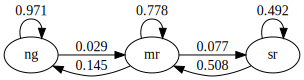

In [3]:
from graphviz import Digraph

dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("ng")
dot.node("mr")
dot.node("sr")

dot.edge("ng", "ng", label="0.971")
dot.edge("ng", "mr", label="0.029")
dot.edge("mr", "ng", label="0.145")

dot.edge("mr", "mr", label="0.778")
dot.edge("mr", "sr", label="0.077")
dot.edge("sr", "mr", label="0.508")
    
dot.edge("sr", "sr", label="0.492")
dot

Here there are three **states**

* "ng" represents normal growth
* "mr" represents mild recession
* "sr" represents severe recession

The arrows represent **transition probabilities** over one month.

For example, the arrow from mild recession to normal growth has 0.145 next to it.

This tells us that, according to past data, there is a 14.5% probability of transitioning from mild recession to normal growth in one month.

The arrow from normal growth back to normal growth tells us that there is a
97% probability of transitioning from normal growth to normal growth (staying
in the same state).

Note that these are *conditional* probabilties --- the probability of
transitioning from one state to another (or staying at the same one) conditional on the
current state.

To make the problem easier to work with numerically, let's convert states to
numbers.

In particular, we agree that

* state 0 represents normal growth
* state 1 represents mild recession
* state 2 represents severe recession

Now let $X_t$ record the value of the state at time $t$.

We can now write the statement "there is a 14.5% probability of transitioning from mild recession to normal growth in one month" as

$$
    \mathbb P\{X_{t+1} = 0 \,|\, X_t = 1\} = 0.145
$$

We can collect all of these conditional probabilities into a matrix, as follows

$$
    P =
    \left(
      \begin{array}{ccc}
         0.971 & 0.029 & 0 \\
         0.145 & 0.778 & 0.077 \\
         0 & 0.508 & 0.492
      \end{array}
    \right)
$$

Notice that $P$ is a stochastic matrix.

Now we have the following relationship

$$
    \mathbb P\{X_{t+1} = 0 \,|\, X_t = 1\} = P(1,0)
$$

where $P(1,0)$ is element $(1,0)$ of $P$.

We see now that $P(1,0)$ is the probability of transitioning from state 0 to
state 1 in one month.

More generally, for any $i,j$ between 0 and 2, we have

$$
\begin{aligned}
    P(i,j)
    & = \mathbb P\{X_{t+1} = j \,|\, X_t = i\} 
    \\
    & = \text{ probability of transitioning from state $i$ to state $j$ in one month}
\end{aligned}
$$


(mc_eg1)=
#### Example 2

Consider a worker who, at any given time $t$, is either unemployed (state 0)
or employed (state 1).

Suppose that, over a one month period,

1. the unemployed worker finds a job with probability $\alpha \in (0, 1)$.
1. the employed worker loses her job and becomes unemployed with probability $\beta \in (0, 1)$.

Given the above information, we can write out the transition probabilities in matrix form as

```{math}
:label: p_unempemp

P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right)
```

For example,

$$
\begin{aligned}
    P(0,1) 
        & = 
        \text{ probability of transitioning from state $0$ to state $1$ in one month}
        \\
        & = 
        \text{ probability finding a job next month}
        \\
        & = \alpha
\end{aligned}
$$

Suppose we can estimate the values $\alpha$ and $\beta$.

Then we can address a range of questions, such as

* What is the average duration of unemployment?
* Over the long-run, what fraction of time does a worker find herself unemployed?
* Conditional on employment, what is the probability of becoming unemployed at least once over the next 12 months?

We'll cover such applications below.

### Defining Markov Chains

So far we've given examples of Markov chains but now let's define them more
carefully.

To begin, let $S$ be a finite set with $n$ elements $\{x_1, \ldots, x_n\}$.

The set $S$ is called the **state space** and $x_1, \ldots, x_n$ are the **state values**.

A **Markov chain** $\{X_t\}$ on $S$ is a sequence of random variables on $S$ that have the **Markov property**.

This means that, for any date $t$ and any state $y \in S$,

```{math}
:label: fin_markov_mp

\mathbb P \{ X_{t+1} = y  \,|\, X_t \}
= \mathbb P \{ X_{t+1}  = y \,|\, X_t, X_{t-1}, \ldots \}
```

In other words, knowing the current state is enough to know probabilities for future states.

In particular, the dynamics of a Markov chain are fully determined by the set of values

```{math}
:label: mpp

P(x, y) := \mathbb P \{ X_{t+1} = y \,|\, X_t = x \}
\qquad (x, y \in S)
```

By construction,

* $P(x, y)$ is the probability of going from $x$ to $y$ in one unit of time (one step)
* $P(x, \cdot)$ is the conditional distribution of $X_{t+1}$ given $X_t = x$

We can view $P$ as a stochastic matrix where

$$
    P_{ij} = P(x_i, x_j)
    \qquad 1 \leq i, j \leq n
$$

Going the other way, if we take a stochastic matrix $P$, we can generate a Markov
chain $\{X_t\}$ as follows:

* draw $X_0$ from a marginal distribution $\psi$ 
* for each $t = 0, 1, \ldots$, draw $X_{t+1}$ from $P(X_t,\cdot)$

By construction, the resulting process satisfies {eq}`mpp`.



## Simulation

```{index} single: Markov Chains; Simulation
```

One natural way to answer questions about Markov chains is to simulate them.

Let's start by doing this ourselves and then look at libraries that can help
us.

In these exercises, we'll take the state space to be $S = 0,\ldots, n-1$.

### Rolling Our Own

To simulate a Markov chain, we need its stochastic matrix $P$ and a probability mass function $\psi$ on $S$ from which to draw a realization of $X_0$.

The Markov chain is then constructed as follows:

1. At time $t=0$, draw a realization of  $X_0$  from $\psi$.
1. At each subsequent time $t$, draw a realization of the new state $X_{t+1}$ from $P(X_t, \cdot)$.

To implement this simulation procedure, we need a method for generating draws from a discrete distribution.

For this task, we'll use `random.draw` from [QuantEcon](http://quantecon.org/quantecon-py).

To use `random.draw`, we first need to convert the probability mass function
to a cummulative distribution

In [4]:
ψ = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(ψ)       # convert into cummulative distribution
cdf

array([0.3, 1. ])

In [5]:
qe.random.draw(cdf, 5)   # generate 5 independent draws from ψ

array([1, 1, 0, 0, 1])

We'll write our code as a function that accepts the following three arguments

* A stochastic matrix `P`
* An initial state `init`
* A positive integer `sample_size` representing the length of the time series the function should return

TODO: Link to distribution lecture

In [6]:
def mc_sample_path(P, ψ_0=None, sample_size=1_000):

    # set up
    P = np.asarray(P)
    X = np.empty(sample_size, dtype=int)

    # Convert each row of P into a cdf
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]
    print(P_dist)

    # draw initial state, defaulting to 0
    X_0 = qe.random.draw(np.cumsum(ψ_0)) if ψ_0 is not None else 0

    # simulate
    X[0] = X_0
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return X


In [7]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [8]:
arr[:, 1]

array([2, 5, 8])

In [9]:
# Update values of column 2 (index 1)
col = arr[:, 1]
col[1:] = col[:-1] + col[1:]
col

array([ 2,  7, 13])

Let's see how it works using the small matrix

In [10]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

As we'll see later, for a long series drawn from `P`, the fraction of the sample that takes value 0 will be about 0.25.

Moreover, this is true, regardless of the initial distribution from which
$X_0$ is drawn.

The following code illustrates this

In [11]:
X = mc_sample_path(P, ψ_0=[0.1, 0.9], sample_size=100_000)
np.mean(X == 0)

[array([0.4, 1. ]), array([0.2, 1. ])]


0.24878

You can try changing the initial distribution to confirm that the output is
always close to 0.25, at least for the `P` matrix above.

### Using QuantEcon's Routines

[QuantEcon.py](http://quantecon.org/quantecon-py) has routines for handling Markov chains, including simulation.

Here's an illustration using the same $P$ as the preceding example


In [12]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)

0.250374

The `simulate` routine is [JIT compiled](https://python-programming.quantecon.org/numba.html#numba-link) and much faster.

In [13]:
%time mc_sample_path(P, sample_size=1_000_000) # Our homemade code version

[array([0.4, 1. ]), array([0.2, 1. ])]
CPU times: user 287 ms, sys: 3.97 ms, total: 291 ms
Wall time: 292 ms


array([0, 1, 1, ..., 0, 0, 0])

In [14]:
%time mc.simulate(ts_length=1_000_000) # qe code version

CPU times: user 18.9 ms, sys: 2.47 ms, total: 21.4 ms
Wall time: 20.1 ms


array([0, 1, 1, ..., 1, 1, 1])

#### Adding State Values and Initial Conditions

If we wish to, we can provide a specification of state values to `MarkovChain`.

These state values can be integers, floats, or even strings.

The following code illustrates

In [15]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'employed', 'unemployed'], dtype='<U10')

In [16]:
mc.simulate(ts_length=4, init='unemployed')

array(['unemployed', 'unemployed', 'employed', 'unemployed'], dtype='<U10')

In [17]:
mc.simulate(ts_length=4)  # Start at randomly chosen initial state

array(['employed', 'employed', 'employed', 'employed'], dtype='<U10')

If we want to see indices rather than state values as outputs as  we can use


In [18]:
mc.simulate_indices(ts_length=4)

array([1, 0, 0, 1])

(mc_md)=
## Marginal Distributions 

Suppose that

1. $\{X_t\}$ is a Markov chain with stochastic matrix $P$
1. the marginal distribution of $X_t$ is known to be $\psi_t$

What then is the marginal distribution of $X_{t+1}$, or, more generally, of $X_{t+m}$?

To answer this, we let $\psi_t$ be the marginal distribution of $X_t$ for $t = 0, 1, 2, \ldots$.

Our first aim is to find $\psi_{t + 1}$ given $\psi_t$ and $P$.

To begin, pick any $y  \in S$.

Using the [law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability), we argue as follows:

$$
\mathbb P \{X_{t+1} = y \}
   = \sum_{x \in S} \mathbb P \{ X_{t+1} = y \, | \, X_t = x \}
               \cdot \mathbb P \{ X_t = x \}
$$

In words, to get the probability of being at $y$ tomorrow, we account for
all ways this can happen and sum their probabilities.

Rewriting this statement in terms of  marginal and conditional probabilities gives

$$
    \psi_{t+1}(y) = \sum_{x \in S} P(x,y) \psi_t(x)
$$

There are $n$ such equations, one for each $y \in S$.

If we think of $\psi_{t+1}$ and $\psi_t$ as *row vectors*, these $n$ equations are summarized by the matrix expression

```{math}
:label: fin_mc_fr

\psi_{t+1} = \psi_t P
```

Thus, to move a marginal distribution forward one unit of time, we postmultiply by $P$.

By postmultiplying $m$ times, we move a marginal distribution forward $m$ steps into the future.

Hence, iterating on {eq}`fin_mc_fr`, the expression $\psi_{t+m} = \psi_t P^m$ is also valid --- here $P^m$ is the $m$-th power of $P$.

As a special case, we see that if $\psi_0$ is the initial distribution from
which $X_0$ is drawn, then $\psi_0 P^m$ is the distribution of
$X_m$.

This is very important, so let's repeat it

```{math}
:label: mdfmc

X_0 \sim \psi_0 \quad \implies \quad X_m \sim \psi_0 P^m
```

and, more generally,

```{math}
:label: mdfmc2

X_t \sim \psi_t \quad \implies \quad X_{t+m} \sim \psi_t P^m
```



(finite_mc_mstp)=
### Multiple Step Transition Probabilities

We know that the probability of transitioning from $x$ to $y$ in
one step is $P(x,y)$.

It turns out that the probability of transitioning from $x$ to $y$ in
$m$ steps is $P^m(x,y)$, the $(x,y)$-th element of the
$m$-th power of $P$.

To see why, consider again {eq}`mdfmc2`, but now with a $\psi_t$ that puts all probability on state $x$ so that the transition probabilities are

* 1 in the $x$-th position and zero elsewhere

Inserting this into {eq}`mdfmc2`, we see that, conditional on $X_t = x$, the distribution of $X_{t+m}$ is the $x$-th row of $P^m$.

In particular

$$
\mathbb P \{X_{t+m} = y \,|\, X_t = x \} = P^m(x, y) = (x, y) \text{-th element of } P^m
$$



### Example: Probability of Recession

```{index} single: Markov Chains; Future Probabilities
```

Recall the stochastic matrix $P$ for recession and growth {ref}`considered above <mc_eg2>`.

Suppose that the current state is unknown --- perhaps statistics are available only  at the *end* of the current month.

We guess that the probability that the economy is in state $x$ is $\psi(x)$.

The probability of being in recession (either mild or severe) in 6 months time is given by the inner product

$$
\psi P^6
\cdot
\left(
  \begin{array}{c}
     0 \\
     1 \\
     1
  \end{array}
\right)
$$



(mc_eg1-1)=
### Example 2: Cross-Sectional Distributions

The marginal distributions we have been studying can be viewed either as
probabilities or as cross-sectional frequencies that a Law of Large Numbers
leads us to anticipate for  large samples.

To illustrate, recall our model of employment/unemployment dynamics for a given worker {ref}`discussed above <mc_eg1>`.

Consider a large population of workers, each of whose lifetime experience is
described by the specified dynamics, with each worker's outcomes being
realizations of processes that are statistically independent of all other
workers' processes.

Let $\psi$ be the current *cross-sectional* distribution over $\{ 0, 1 \}$.

The cross-sectional distribution records fractions of workers employed and unemployed at a given moment.

* For example, $\psi(0)$ is the unemployment rate.

What will the cross-sectional distribution be in 10 periods hence?

The answer is $\psi P^{10}$, where $P$ is the stochastic matrix in
{eq}`p_unempemp`.

This is because each worker's state evolves according to $P$, so
$\psi P^{10}$ is a marginal distibution  for a single randomly selected
worker.

But when the sample is large, outcomes and probabilities are roughly equal (by an application of the Law
of Large Numbers).

So for a very large (tending to infinite) population,
$\psi P^{10}$ also represents  fractions of workers in
each state.

This is exactly the cross-sectional distribution.




## Irreducibility 

Irreducibility is a central concept of Markov chain theory.

To explain it, let's take $P$ to be a fixed stochastic matrix.

Two states $x$ and $y$ are said to **communicate** with each other if
there exist positive integers $j$ and $k$ such that

$$
P^j(x, y) > 0
\quad \text{and} \quad
P^k(y, x) > 0
$$

In view of our discussion {ref}`above <finite_mc_mstp>`, this means precisely
that

* state $x$ can eventually be reached from state $y$, and
* state $y$ can eventually be reached from state $x$

The stochastic matrix $P$ is called **irreducible** if all states communicate;
that is, if $x$ and $y$ communicate for all $(x, y)$ in $S \times S$.

For example, consider the following transition probabilities for wealth of a
fictitious set of households

TODO hide this code

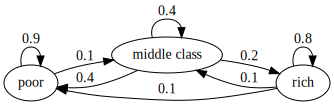

In [19]:
dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("poor")
dot.node("middle class")
dot.node("rich")

dot.edge("poor", "poor", label="0.9")
dot.edge("poor", "middle class", label="0.1")
dot.edge("middle class", "poor", label="0.4")
dot.edge("middle class", "middle class", label="0.4")
dot.edge("middle class", "rich", label="0.2")
dot.edge("rich", "poor", label="0.1")
dot.edge("rich", "middle class", label="0.1")
dot.edge("rich", "rich", label="0.8")

dot

In [20]:
# SUM the power to test the irreducibility

We can translate this into a stochastic matrix, putting zeros where
there's no edge between nodes

$$
P :=
\left(
  \begin{array}{ccc}
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
  \end{array}
\right)
$$

It's clear from the graph that this stochastic matrix is irreducible: we can  eventually
reach any state from any other state.

We can also test this using [QuantEcon.py](http://quantecon.org/quantecon-py)'s MarkovChain class

In [21]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible


True

Here's a more pessimistic scenario in which  poor people remain poor forever

TODO: Hide this code

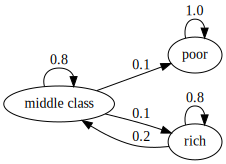

In [22]:
dot = Digraph(comment='Graph')
dot.attr(rankdir='LR')
dot.node("poor")
dot.node("middle class")
dot.node("rich")

dot.edge("poor", "poor", label="1.0")
dot.edge("middle class", "poor", label="0.1")
dot.edge("middle class", "middle class", label="0.8")
dot.edge("middle class", "rich", label="0.1")
dot.edge("rich", "middle class", label="0.2")
dot.edge("rich", "rich", label="0.8")

dot

This stochastic matrix is not irreducible, since, for example, rich is not
accessible from poor.

Let's confirm this

In [23]:

P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

We can also determine the "communication classes"

In [24]:
mc.communication_classes

[array(['poor'], dtype='<U6'), array(['middle', 'rich'], dtype='<U6')]

It might be clear to you already that irreducibility is going to be important
in terms of long run outcomes.

For example, poverty is a life sentence in the second graph but not the first.

We'll come back to this a bit later.


(ergodicity)=
## Ergodicity 

Under irreducibility, yet another important result obtains: 

TODO -- convert to environment

Theorem:  If $P$ is irreducible and $\psi^*$ is the unique stationary
distribition, then, for all $x \in S$,

```{math}
:label: llnfmc0

\frac{1}{m} \sum_{t = 1}^m \mathbf{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{as } m \to \infty
```

Here

* $\{X_t\}$ is a Markov chain with stochastic matrix $P$ and initial
  distribition $\psi_0$
* $\mathbf{1}\{X_t = x\} = 1$ if $X_t = x$ and zero otherwise

TODO -- in the next line, refer to the theorem by number.

The result in theorem XXX is sometimes called **ergodicity**.

Unlike stationarity, erogdicity is a sample path property

The theorem tells us that the fraction of time the chain spends at state $x$
converges to $\psi^*(x)$ as time goes to infinity.

(new_interp_sd)=
This gives us another way to interpret the stationary distribution (provided irreducibility holds).

Importantly, the result is valid for any choice of $\psi_0$.

Notice that the theorem is related to the law of large numbers.

TODO -- link to our undergrad lln and clt lecture

It tells us that, in some settings, the law of large numbers sometimes holds even when the
sequence of random variables is not IID.


TODO --- add the Hamilton2005 Markov chain as an example, similar to the one
below.

(mc_eg1-2)=
### Example

Recall our cross-sectional interpretation of the employment/unemployment model {ref}`discussed above <mc_eg1-1>`.

Assume that $\alpha \in (0,1)$ and $\beta \in (0,1)$, so that irreducibility and aperiodicity both hold.

We saw that the stationary distribution is $(p, 1-p)$, where

$$
p = \frac{\beta}{\alpha + \beta}
$$

In the cross-sectional interpretation, this is the fraction of people unemployed.

In view of our latest (ergodicity) result, it is also the fraction of time that a single worker can expect to spend unemployed.

Thus, in the long-run, cross-sectional averages for a population and time-series averages for a given person coincide.

This is one aspect of the concept of ergodicity.

Similarly, for Hamilton example {ref}`discussed above <mc_eg2>`. 

On this aperiodic model, it is possible to find a power of the matrix, which guarantees our model will visit all the state space. 

You can see how it condition relates to Theorem ### TODO -- in the next line, refer to the theorem by number.

The stochastic matrix is irreducible and there is a 

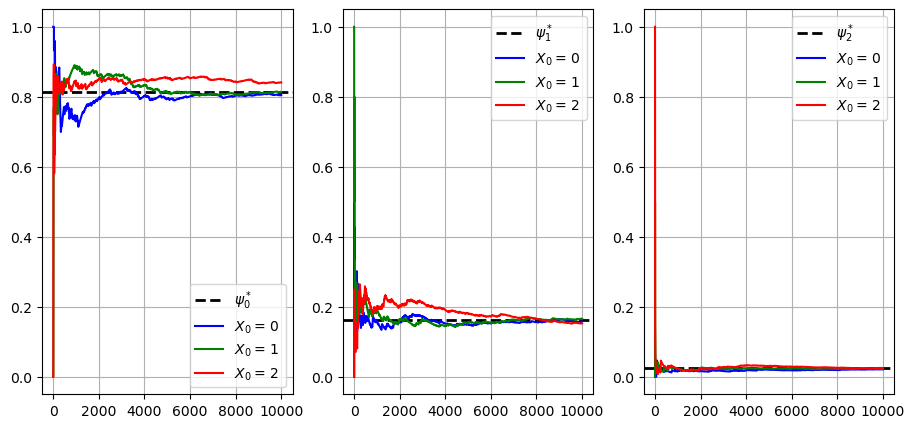

In [27]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
N = 10_000
mc = MarkovChain(P)
n_state = P.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=n_state)
ψ_star = mc.stationary_distributions[0]
for i in range(n_state):
    axes[i].grid()
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', label = fr'$\psi_{i}^*$')

    for x0, col in ((0, 'blue'), (1, 'green'), (2, 'red')):
        # Generate time series for worker that starts at x0
        X = mc.simulate(N, init=x0)
        # Compute fraction of time spent, for each n
        X_bar = (X == i).cumsum() / (1 + np.arange(N, dtype=float))
        # Plot
        axes[i].plot(X_bar, color=col, label=f'$X_0 = \, {x0} $')

    axes[i].legend()
plt.show()

In [ ]:
P = np.array([[0, 1],
              [1, 0]])
N = 1000
mc = MarkovChain(P)
n_state = P.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=n_state)
ψ_star = mc.stationary_distributions[0]
for i in range(n_state):
    axes[i].grid()
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', label = fr'$\psi_{i}$')

    for x0 in range(n_state):
        # Generate time series for worker that starts at x0
        X = mc.simulate(N, init=x0)
        # Compute fraction of time spent, for each n
        X_bar = (X == i).cumsum() / (1 + np.arange(N, dtype=float))
        # Plot
        axes[i].plot(X_bar, label=f'$X_0 = \, {x0} $')

    axes[i].legend()
plt.show()

Such distributions are called **stationary** or **invariant**.

(mc_stat_dd)=
Formally, a marginal distribution $\psi^*$ on $S$ is called **stationary** for $P$ if $\psi^* = \psi^* P$.

From this equality, we immediately get $\psi^* = \psi^* P^t$ for all $t$.

This tells us an important fact: If the distribution of $X_0$ is a stationary distribution, then $X_t$ will have this same distribution for all $t$.

TODO -- convert to theorem environment

**Theorem.** Every stochastic matrix $P$ has at least one stationary distribution.

A proof of this theorem can be constructed from the Perron-Frobenius theorem,
which we discuss in another lecture.

TODO -- link to eigenvector and eigenvalue

Note that there can be many stationary distributions corresponding to a given
stochastic matrix $P$.

* For example, if $P$ is the identity matrix, then all marginal distributions are stationary.

To get uniqueness, we need the Markov chain to "mix around," so that the state
doesn't get stuck in some part of the state space.

This gives some intuition for the following fundamental theorem.

TODO -- convert to theorem environment

(mc_conv_thm)=
**Theorem.** If $P$ is irreducible, then $P$ has exactly one stationary
distribution $\psi^*$.

For a proof, see, for example, theorem 5.2 of {cite}`haggstrom2002finite`.

### Example

Recall our model of the employment/unemployment dynamics of a particular worker {ref}`discussed above <mc_eg1>`.

If $\alpha \in (0,1)$ and $\beta \in (0,1)$, then the irreducibility condition is satisfied.

Let $\psi^* = (p, 1-p)$ be the stationary distribution, so that $p$
corresponds to unemployment (state 0).

Using $\psi^* = \psi^* P$ and a bit of algebra yields

$$
    p = \frac{\beta}{\alpha + \beta}
$$

This is, in some sense, a steady state probability of unemployment.

Not surprisingly it tends to zero as $\beta \to 0$, and to one as $\alpha \to 0$.


## Stationary Distributions 

As seen in {eq}`fin_mc_fr`, we can shift a marginal distribution forward one
unit of time via postmultiplication by $P$.

Some distributions are invariant under this updating process --- for example,

In [ ]:
P = np.array([[0.4, 0.6],
              [0.2, 0.8]])
ψ = (0.25, 0.75)
ψ @ P

### Calculating Stationary Distributions

A stable algorithm for computing stationary distributions is implemented in [QuantEcon.py](http://quantecon.org/quantecon-py).

Here's an example

In [ ]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

### Convergence to Stationarity

Sometimes the distribution $\psi_t = \psi_0 P^t$ of $X_t$ converges to the
stationary distribution regardless of where we begin.

For example, we have the following result

TODO -- convert to theorem environment

Theorem: If there exists a an integer $m$ such that all entries of $P^m$ are
strictly positive, then $P$ has only one stationary distribution $\psi^*$ and

$$
    \psi_0 P^t \to \psi
    \quad \text{as } t \to \infty
$$    

(See, for example, {cite}`haggstrom2002finite`. Our assumptions imply that $P$
is irreducible and [aperiodic](https://en.wikipedia.org/wiki/Aperiodic_graph).)



The convergence in the theorem is illustrated in the next figure

In [ ]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))
P = np.array(P)

ψ_1 = (0.0, 0.2, 0.8)        # Initial conditions
ψ_2 = (0.25, 0.25, 0.5)  
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

def simulate_ψ(ψ, P, n):
    x_vals, y_vals, z_vals = [], [], []
    for t in range(n):
        x_vals.append(ψ[0])
        y_vals.append(ψ[1])
        z_vals.append(ψ[2])
        ψ = ψ @ P
    return x_vals, y_vals, z_vals

ax.scatter(*simulate_ψ(ψ_1, P, 30), c='r', s=60, alpha=0.3)
ax.scatter(*simulate_ψ(ψ_2, P, 100), c='g', s=60, alpha=0.3)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=150)

plt.show()

Here

* $P$ is the stochastic matrix for recession and growth {ref}`considered above <mc_eg2>`.
* The highest red dot is an arbitrarily chosen initial marginal probability distribution  $\psi$, represented as a vector in $\mathbb R^3$.
* The other red dots are the marginal distributions $\psi P^t$ for $t = 1, 2, \ldots$.
* The black dot is $\psi^*$.

You might like to try experimenting with different initial conditions.

In [ ]:
import random

# Define the transition matrix
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
n = 25
n_state = P.shape[0]
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, axes = plt.subplots(nrows=1, ncols=n_state)
x0s = np.ones((n, n_state))
for i in range(n):
    # Define the initial state
    nums = np.random.randint(1, 10_000_000, size=n_state)
    x0s[i,:] = np.array(nums/sum(nums))
# Define the number of iterations
n = 50

for x0 in x0s:
    # Define the resulting state
    x = x0
    # Define the sum of all resulting states
    x_sum = np.zeros(n_state)
    X = np.zeros((n,n_state))
    # Simulate the LLN_0
    for i in range(1, n):
        x =  x @ P 
        X[i] = x
    for i in range(n_state):
        axes[i].plot(range(0, n), X[:,i], alpha=0.3)
    
np.mean(X == 0)
for i in range(n_state):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', label = fr'$\psi_{i}^*$')
    axes[i].legend()

plt.show()
# Calculate the average of all resulting states
print(X.shape)
x_avg = np.sum(X, axis = 0) / n

print(f"The average of all resulting states: {x_avg}, and the stationary distribution is {ψ_star}")

In [ ]:
import random

P2 = np.array([[0, 1],
              [1, 0]])
n = 25
n_state = P.shape[0]
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, axes = plt.subplots(nrows=1, ncols=n_state)
x0s = np.ones((n, n_state))
for i in range(n):
    # Define the initial state
    nums = np.random.randint(1, 10_000_000, size=n_state)
    x0s[i,:] = np.array(nums/sum(nums))
# Define the number of iterations
n = 50

for x0 in x0s:
    # Define the resulting state
    x = x0
    # Define the sum of all resulting states
    x_sum = np.zeros(n_state)
    X = np.zeros((n,n_state))
    
    for i in range(1, n):
        x = x @ P2
        X[i] = x
    for i in range(n_state):
        axes[i].plot(range(20, n), X[20:,i], alpha=0.3)
    
for i in range(n_state):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black', label = fr'$\psi_{i}^*$')
    axes[i].legend()

plt.show()
# Calculate the average of all resulting states
print(X.shape)
x_avg = np.sum(X, axis = 0) / n

print(f"The average of all resulting states: {x_avg}, and the stationary distribution is {ψ_star}")

(finite_mc_expec)=
## Computing Expectations

Sample path property and distribution property

```{index} single: Markov Chains; Forecasting Future Values
```

We sometimes want to  compute mathematical  expectations of functions of $X_t$ of the form

```{math}
:label: mc_une

\mathbb E [ h(X_t) ]
```

and conditional expectations such as

```{math}
:label: mc_cce

\mathbb E [ h(X_{t + k})  \mid X_t = x]
```

where

* $\{X_t\}$ is a Markov chain generated by $n \times n$ stochastic matrix $P$
* $h$ is a given function, which, in terms of matrix
  algebra, we'll think of as the column vector

$$
h
= \left(
\begin{array}{c}
    h(x_1) \\
    \vdots \\
    h(x_n)
\end{array}
  \right)
$$

Computing the unconditional expectation {eq}`mc_une` is easy.

We just sum over the marginal  distribution  of $X_t$ to get

$$
\mathbb E [ h(X_t) ]
= \sum_{x \in S} (\psi P^t)(x) h(x)
$$

Here $\psi$ is the distribution of $X_0$.

Since $\psi$ and hence $\psi P^t$ are row vectors, we can also
write this as

$$
\mathbb E [ h(X_t) ]
=  \psi P^t h
$$

For the conditional expectation {eq}`mc_cce`, we need to sum over
the conditional distribution of $X_{t + k}$ given $X_t = x$.

We already know that this is $P^k(x, \cdot)$, so

```{math}
:label: mc_cce2

\mathbb E [ h(X_{t + k})  \mid X_t = x]
= (P^k h)(x)
```

The vector $P^k h$ stores the conditional expectation $\mathbb E [ h(X_{t + k})  \mid X_t = x]$ over all $x$.



### Expectations of Geometric Sums

Sometimes we want to compute the mathematical expectation of a geometric sum, such as
$\sum_t \beta^t h(X_t)$.

In view of the preceding discussion, this is

$$
\mathbb{E} [
        \sum_{j=0}^\infty \beta^j h(X_{t+j}) \mid X_t = x
    \Bigr]
= [(I - \beta P)^{-1} h](x)
$$

where

$$
(I - \beta P)^{-1}  = I + \beta P + \beta^2 P^2 + \cdots
$$

TODO -- connect to the Neumann series lemma (Maanasee)

TODO -- add more exercises.


## Exercises

```{exercise} 
:label: fm_ex1

According to the discussion {ref}`above <mc_eg1-2>`, if a worker's employment dynamics obey the stochastic matrix

$$
P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right)
$$

with $\alpha \in (0,1)$ and $\beta \in (0,1)$, then, in the long-run, the fraction
of time spent unemployed will be

$$
p := \frac{\beta}{\alpha + \beta}
$$

In other words, if $\{X_t\}$ represents the Markov chain for
employment, then $\bar X_m \to p$ as $m \to \infty$, where

$$
\bar X_m := \frac{1}{m} \sum_{t = 1}^m \mathbf{1}\{X_t = 0\}
$$

This exercise asks you to illustrate convergence by computing
$\bar X_m$ for large $m$ and checking that
it is close to $p$.

You will see that this statement is true regardless of the choice of initial
condition or the values of $\alpha, \beta$, provided both lie in
$(0, 1)$.
```

```{solution-start} fm_ex1
:class: dropdown
```

We will address this exercise graphically.

The plots show the time series of $\bar X_m - p$ for two initial
conditions.

As $m$ gets large, both series converge to zero.


In [ ]:
α = β = 0.1
N = 10000
p = β / (α + β)

P = ((1 - α,       α),               # Careful: P and p are distinct
     (    β,   1 - β))
mc = MarkovChain(P)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   # Horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    # Generate time series for worker that starts at x0
    X = mc.simulate(N, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    # Plot
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=col, alpha=0.1)
    ax.plot(X_bar - p, color=col, label=f'$X_0 = \, {x0} $')
    # Overlay in black--make lines clearer
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

```{solution-end}
```

In [ ]:
import scipy.stats as st

# Linear Idependent of Normal Normal.
n = 100000
x = np.ones(n+1)
σ = 5
α = 0.9
β = 0.1
x[0] = st.norm.rvs(α/(1-β), np.power(α, 2)/(1-np.power(β, 2)))
ϵ = st.norm.rvs(size=n+1
for t in range(n):
    x[t+1] = α + β * x[t] + σ * ϵ[t+1]
print(x)

mean = α/(1-β)
var = σ
X = np.linspace(mean-5*np.sqrt(var), mean+5*np.sqrt(var), 1001)
pdf = st.norm.pdf(X, mean, var)

plt.plot(X, pdf, label="Theoretical Stationary Distribution")
plt.hist(x, bins=50, density=True, alpha=0.5, label="Generated Samples")
plt.legend()
plt.show()